In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn_prediction.csv to churn_prediction (1).csv


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as mtick

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['churn_prediction.csv']))
df = df.drop(columns = ['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Preprocessing


In [ ]:
#Converting total charges to float
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df = df.dropna()
df.isnull().sum() #Count Rows containing NaN

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###Encoding categorical variables

In [ ]:
multi_cols = [df.gender,df.Contract,df.PaymentMethod,df.InternetService,df.MultipleLines,df.OnlineBackup,
              df.OnlineSecurity,df.DeviceProtection,df.TechSupport,df.StreamingTV,df.StreamingMovies,
              df.PaperlessBilling, df.Partner, df.Dependents, df.PhoneService, df.Churn]
multi_colnames = ["gender","Contract","PaymentMethod","InternetService","MultipleLines","OnlineBackup",
                  "OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","StreamingMovies", 
                  "PaperlessBilling","Partner","Dependents","PhoneService","Churn"]

for i in range(len(multi_cols)):
  df[multi_colnames[i]] = pd.factorize(multi_cols[i])[0]

#Converting yes/no to boolean
#yes_no_cols = ["PaperlessBilling","Partner","Dependents","PhoneService","Churn"]
#df[yes_no_cols] = df[yes_no_cols] == 'Yes'


In [ ]:
df.dtypes
df.isnull().sum()
df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
5,0,0,1,0,8,1,2,1,0,1,1,0,1,1,0,0,0,99.65,820.50,1
6,1,0,1,1,22,1,2,1,0,0,0,0,1,0,0,0,3,89.10,1949.40,0
7,0,0,1,0,10,0,0,0,1,1,0,0,0,0,0,1,1,29.75,301.90,0
8,0,0,0,0,28,1,2,1,0,1,1,1,1,1,0,0,0,104.80,3046.05,1
9,1,0,1,1,62,1,1,0,1,0,0,0,0,0,1,1,2,56.15,3487.95,0


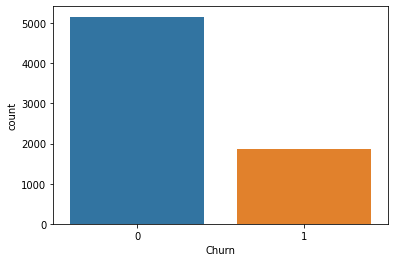

In [ ]:
sns.countplot(df.iloc[:,-1])

It is clear from the above histogram that the classes are highly imbalanced in the data set. A sampling technique must be used in order to balance the distribution of the classes

###SMOTE 
SMOTE is a sampling technique used to deal with imbalanced datasets. It creates new samples of the 'minority' class by taking the nearest neighbors of the samples present. 

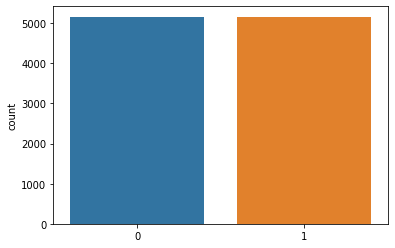

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(df.iloc[:,0:-2], df.iloc[:,-1])
#X_sm, y_sm = smote.fit_sample(X_sm, y_sm)
sns.countplot(y_sm)

##Exploratory Data Analysis


In [ ]:
import seaborn as sns
import plotly.figure_factory as ff
print(df)

      gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
0          0              0        0  ...           29.85         29.85      0
1          1              0        1  ...           56.95       1889.50      0
2          1              0        1  ...           53.85        108.15      1
3          1              0        1  ...           42.30       1840.75      0
4          0              0        1  ...           70.70        151.65      1
...      ...            ...      ...  ...             ...           ...    ...
7038       1              0        0  ...           84.80       1990.50      0
7039       0              0        0  ...          103.20       7362.90      0
7040       0              0        0  ...           29.60        346.45      0
7041       1              1        0  ...           74.40        306.60      1
7042       1              0        1  ...          105.65       6844.50      0

[7032 rows x 20 columns]


                    gender  Contract  ...    tenure     Churn
gender            1.000000  0.000095  ...  0.005285 -0.008545
Contract          0.000095  1.000000  ...  0.676734 -0.396150
PaymentMethod    -0.004928  0.359487  ...  0.340939 -0.262918
InternetService  -0.002236  0.099579  ... -0.029835 -0.047097
MultipleLines    -0.010284  0.084037  ...  0.259112  0.036148
OnlineBackup      0.011081  0.034745  ... -0.253575 -0.073934
OnlineSecurity   -0.004365  0.389138  ...  0.147575 -0.332443
DeviceProtection  0.004526  0.389480  ...  0.180895 -0.281048
TechSupport       0.000057  0.417691  ...  0.146727 -0.329474
StreamingTV       0.000578  0.327109  ...  0.138208 -0.205246
StreamingMovies  -0.001339  0.331126  ...  0.142143 -0.207150
PaperlessBilling  0.011902  0.175475  ... -0.004823 -0.191454
Partner           0.001379 -0.294094  ... -0.381912  0.149982
Dependents        0.010349  0.240556  ...  0.163386 -0.163128
PhoneService     -0.007515  0.003019  ...  0.007877  0.011691
MonthlyC

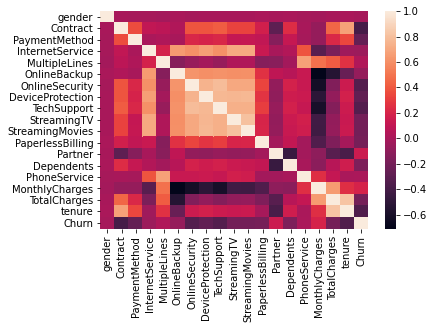

In [ ]:
corr = df[["gender","Contract","PaymentMethod","InternetService",
           "MultipleLines","OnlineBackup","OnlineSecurity","DeviceProtection",
           "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling",
           "Partner","Dependents","PhoneService","MonthlyCharges","TotalCharges","tenure","Churn"]].corr()
print(corr)
sns.heatmap(corr)

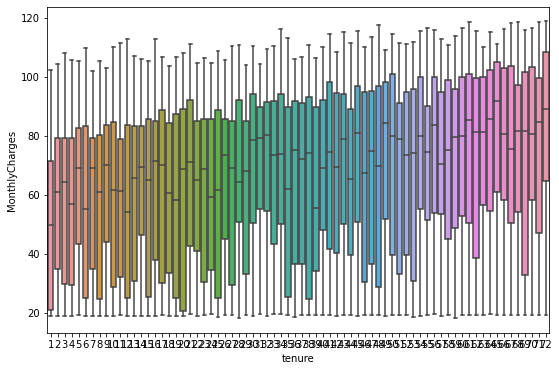

In [ ]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'tenure', y = 'MonthlyCharges', data = df)

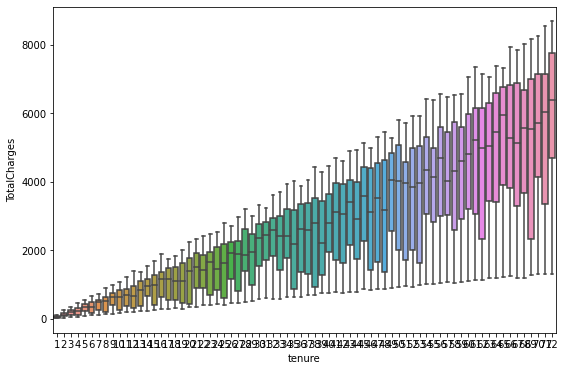

In [ ]:
plt.figure(figsize = (9,6))
sns.boxplot(x = 'tenure', y = 'TotalCharges', data = df)

We can observe very high correlation between monthly charges, tenure and total charges (heat plots). Thus, either of tenure, monthly charges, total charges can be dropped as two of these variables can explain the third one. It is rationale to drop total charges as it is not stationary (increase with increase in tenure) - as observed in the box plot.

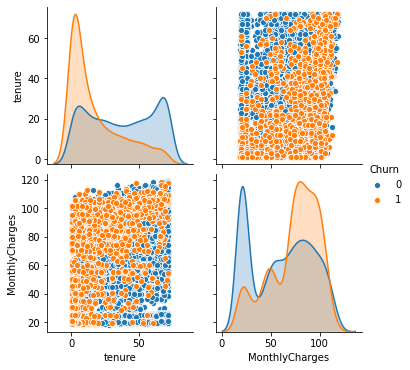

In [ ]:
sns.pairplot(df,vars = ['tenure','MonthlyCharges'], hue="Churn")

People with lower tenure/higher monthly charges have higher probablity of churning.

In [ ]:
df = df.drop(columns = ["TotalCharges"])

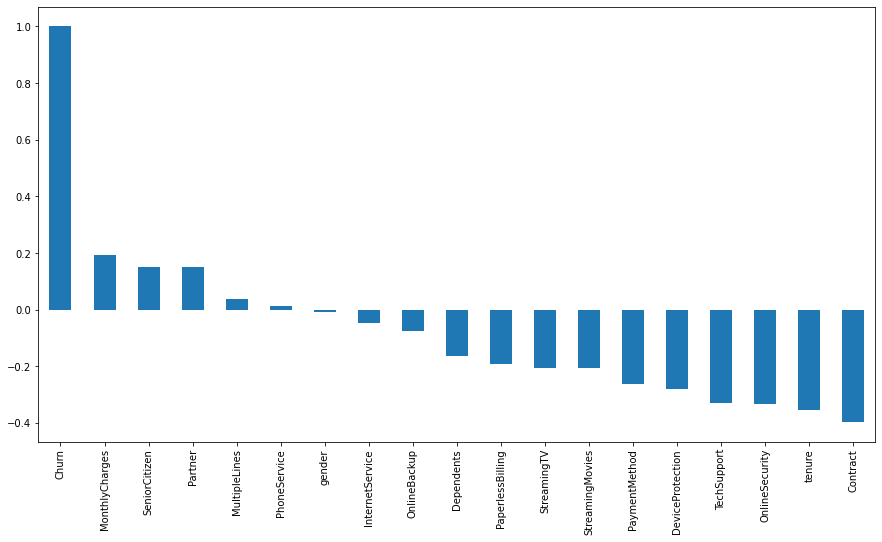

In [ ]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

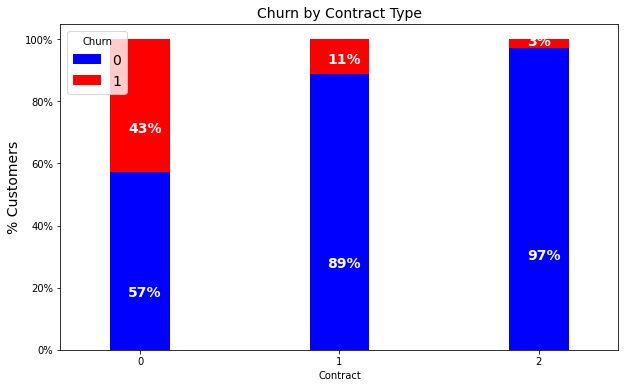

In [ ]:
colors = ['blue','red']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.30*width, p.get_y()+.3*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Customers having two year contract tend to churn less.

##Test Train Split

In [ ]:
X = pd.DataFrame(X_sm)
y = pd.DataFrame(y_sm)
X = X.round()
y = y.round()
dummy = pd.concat([X,y], axis = 1)
dummy = dummy.sample(frac = 1)
X = dummy.iloc[:,0:-2]
y = pd.DataFrame(dummy.iloc[:,-1])

In [ ]:
#80/20 Split
X_train = X.iloc[0:8000,:]
y_train = y.iloc[0:8000,:]

X_test = X.iloc[8000:-1,:]
y_test = y.iloc[8000:-1,:]
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
8732,0.0,0.0,1.0,0.0,15.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
7008,0.0,0.0,1.0,0.0,39.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
5889,0.0,0.0,0.0,1.0,33.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0
1738,1.0,0.0,0.0,0.0,67.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
6108,1.0,0.0,1.0,0.0,69.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0


In [ ]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X_train,y_train)

dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
featureScores.nlargest(10, 'Score')

    Specs         Score
4       4  26932.160042
14     14   2127.730214
8       8   1315.520166
11     11   1287.313884
16     16    934.702330
10     10    826.558430
13     13    376.327442
12     12    353.751246
15     15    305.011507
3       3    255.859307


,Specs,Score
4,4,26932.160042
14,14,2127.730214
8,8,1315.520166
11,11,1287.313884
16,16,934.702330
10,10,826.558430
13,13,376.327442
12,12,353.751246
15,15,305.011507
3,3,255.859307


#Classification

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#Decision Tree
tree = DecisionTreeClassifier(criterion = "gini",splitter = "best", max_depth=6)
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7746236559139785
[[840 343]
 [181 961]]


##Random Forest

In [ ]:
#Random Forest
clf = RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(X_train, y_train)
rf_predict = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, rf_predict))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.7772043010752688
Confusion Matrix
[[840 343]
 [181 961]]


##Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver = 'newton-cg')
logmodel.fit(X_train , y_train)
LR_predictions = logmodel.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, LR_predictions))
print("Confusion Matrix")
print(confusion_matrix(y_test, LR_predictions))

Accuracy:  0.7595698924731182
Confusion Matrix
[[874 309]
 [250 892]]


##SVM

In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, svc_predict))
print("Confusion Matrix")
print(confusion_matrix(y_test, svc_predict))

Accuracy:  0.796989247311828
Confusion Matrix
[[906 277]
 [195 947]]


###Hyperparameter Optimization for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
clf = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
clf.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.596, total=   3.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.591, total=   3.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.589, total=   3.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.588, total=   3.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.601, total=   3.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.747, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.742, total=   2.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.766, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.753, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  7.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print("Best Parameters from GridSearch", clf.best_params_) 
y_pred = clf.predict(X_test)
print(clf.best_estimator_) 

Best Parameters from GridSearch {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
svc = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy:  0.9023655913978494
[[1087   96]
 [ 131 1011]]


###Hyperparameter Optimization for Logistic Regression

In [ ]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [ ]:
from sklearn.model_selection import GridSearchCV
log_grid = GridSearchCV(logmodel, grid_values, cv=3, verbose=0)
log_grid = log_grid.fit(X, y)

In [ ]:
print('Best Penalty:', log_grid.best_estimator_.get_params()['penalty'])
print('Best C:', log_grid.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1


In [ ]:
y_pred = log_grid.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.764731182795699
Confusion Matrix
[[854 302]
 [245 924]]


##Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
cv = cross_validate(svc, X, y, cv=3)['test_score']
print("CV accuracy Scores(SVM):", cv)

CV accuracy Scores(SVM): [0.87245787 0.85996514 0.88814643]
